In [1]:
import numpy
from numpy import arange
from matplotlib import pyplot as plt

import pandas
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [3]:
#%% Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pandas.read_csv(url, delim_whitespace=True, names=names)

In [0]:
# filename = ("housing.csv")
# names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# dataset = read_csv(filename, delim_whitespace=True, names=names)

In [0]:
#%% Summarize Data

# Descriptive statistics
# shape


(506, 14)

In [0]:
# types


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
# head
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [17]:
# descriptions, change precision to 2 places
pandas.set_option('precision',2)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [20]:
# correlation
df=dataset.corr(method='pearson') # If the correlation coefficient is close to 1 i.e. they are highly +vely co-related. if close
# to -1 then they are -vely co-related.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


In [21]:
dataset[(df>0.7)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


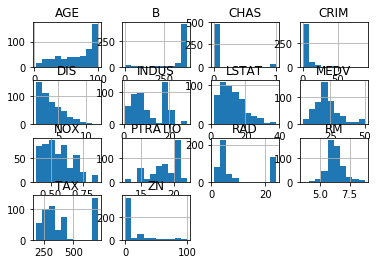

In [0]:
#%% Data visualizations

# histograms
dataset.hist()
plt.show()

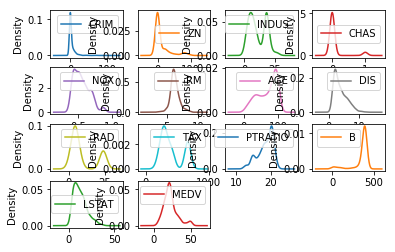

In [27]:
# density
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=False)
plt.show()

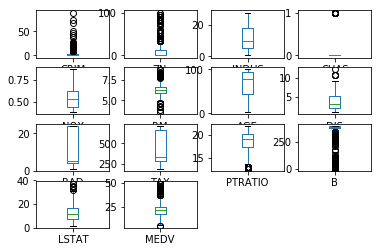

In [29]:
# box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

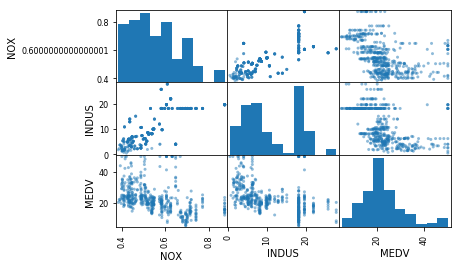

In [35]:
# scatter plot matrix
pandas.plotting.scatter_matrix(dataset[['NOX','INDUS','MEDV']]) #if dots are all over the box then theres no Correlation.
#
plt.show()

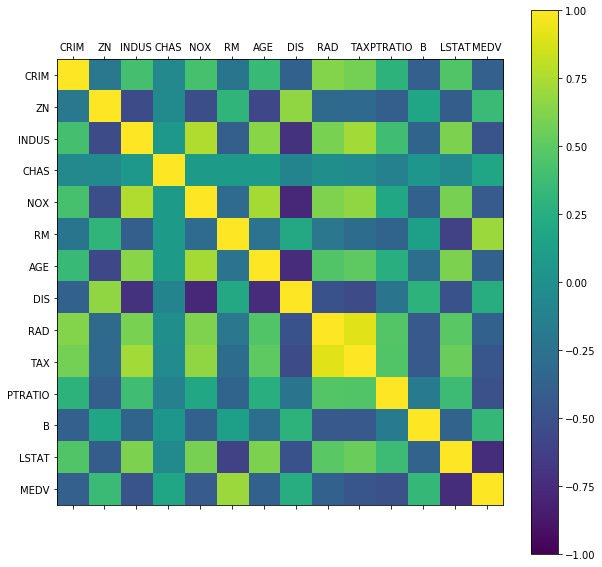

In [36]:
# correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)    #plotted figure
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)    #plotted ColourBar.
ticks = numpy.arange(0,14,1)    #
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [50]:
#%% Prepare Data
from sklearn.model_selection import train_test_split

# Split-out validation dataset
array = dataset.values
X = array[:,:-1]
Y = array[:-1]#all rows and last row.

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=5)

ValueError: Found input variables with inconsistent numbers of samples: [506, 505]

In [43]:
print(X.shape)
print(Y.shape)

(506, 13)
(505, 14)


In [47]:
#%% Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [48]:
scoring = 'neg_mean_squared_error'  # or 'r2'
#scoring = 'r2'

In [49]:
#%% evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:     #unziping models,model is a tuple.First entry of the tuple gies to name.
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)  #5 validation sets
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) #It tries to fit the Y_train and Y_train with the model.
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#     print(sorted(cv_results, reverse=True))

NameError: name 'X_train' is not defined

In [45]:
results

NameError: name 'results' is not defined

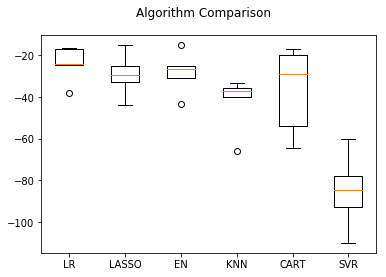

In [0]:
#%% Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
# ouliers are beyond 1 and half times mean of the value. for LR its 7.72 *  1.5  

In [0]:
#%% Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
#rescaledx = StandardScalar().fit_transform(X_train)
#Pipeline:- Pipeline fn. which creates a pipeline and we have to pass 2 tuples.First it scales and deos the regression
#Avoiding data leakage.
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -24.124902 (7.719704)
ScaledLASSO: -29.446586 (9.271611)
ScaledEN: -31.308432 (11.392986)
ScaledKNN: -26.879192 (10.185019)
ScaledCART: -35.720914 (15.727031)
ScaledSVR: -31.994420 (13.425346)


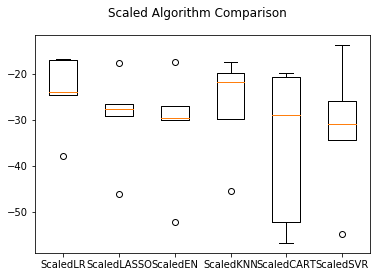

In [0]:
#%% Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
#%% KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,16,17,18,19,21])
param_grid = dict(n_neighbors=k_values) #dict with same key and value pair name.

model = KNeighborsRegressor()
kfold = KFold(n_splits=5, shuffle=True, random_state=5)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)  
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -23.993863 using {'n_neighbors': 11}
-24.016412 (9.218092) with: {'n_neighbors': 1}
-25.398194 (7.235307) with: {'n_neighbors': 3}
-27.631948 (10.021330) with: {'n_neighbors': 5}
-25.335464 (10.656981) with: {'n_neighbors': 7}
-24.446145 (11.989487) with: {'n_neighbors': 9}
-23.993863 (12.716685) with: {'n_neighbors': 11}
-24.392335 (12.560069) with: {'n_neighbors': 13}
-25.720076 (13.170939) with: {'n_neighbors': 15}
-25.884034 (13.725458) with: {'n_neighbors': 16}
-26.661134 (14.083084) with: {'n_neighbors': 17}
-27.002393 (14.263317) with: {'n_neighbors': 18}
-27.640604 (14.326851) with: {'n_neighbors': 19}
-28.554801 (14.308793) with: {'n_neighbors': 21}


In [0]:
#%% ensembles:- combine the accuracy from each of the models.
#Bootstraping is the process of creating a subset that represents the data.
#Bagging = Bootstraping + Aggregation.
#Boosting:-Boosts knowledge from the previous model.
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -20.049855 (8.115501)
ScaledGBM: -12.783521 (6.380200)
ScaledRF: -15.201353 (7.042185)
ScaledET: -13.881567 (6.427078)


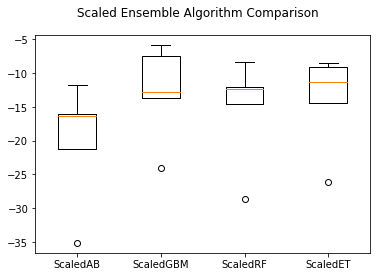

In [0]:
#%% Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
#%% Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -13.323024 using {'n_estimators': 400}
-13.963429 (6.486440) with: {'n_estimators': 50}
-13.422965 (6.342623) with: {'n_estimators': 100}
-13.387057 (6.092109) with: {'n_estimators': 150}
-13.365018 (6.014132) with: {'n_estimators': 200}
-13.372411 (6.003827) with: {'n_estimators': 250}
-13.387741 (5.991245) with: {'n_estimators': 300}
-13.347061 (5.948649) with: {'n_estimators': 350}
-13.323024 (5.916760) with: {'n_estimators': 400}


## Make predictions on validation dataset

In [0]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=5, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=5,
             subsample=1.0, verbose=0, warm_start=False)

In [0]:
# transform the validation dataset
rescaledX_test = scaler.transform(X_test)
predictions = model.predict(rescaledX_test)
print(mean_squared_error(Y_test, predictions))

7.896695566858813


In [0]:
numpy.set_printoptions(precision=2)
print(predictions[:10])

[47.77 27.9  22.64 15.39 41.39  8.52 25.12 26.38 22.65 20.49]


In [0]:
print(Y_test[:10])

[37.6 27.9 22.6 13.8 35.2 10.4 23.9 29.  22.8 23.2]
